# From Deep Learning to Depth Psychology: A Review and Roadmap for Representation Learning Across the Mind Sciences

#### Plots :
- **Cognitive Science** : Adaptation of the original conceptualization of cog sci put forth by the Sloan Foundation in 1978.

- **Night Science** : Adaptation from Yanai & Lercher (2019), with color variations to emphasize distinctions between (even adjcent) fields' views on what counts as day/night science. 
- **Timeline** : Selective timeline of influential events across AI, neuroscience and psychology, with a nod to cybernetics.
- **Hype** : Visualizing hype cycles by recreating the canonical hype cycle and comparing it to empirically obtained frequency counts for the use of words 'cybernetics'.
- **Cognitive Maps, Schemas and Object Relations** : Conceptual representation of cognitive maps', schemas' and object relations' relative utility along an axis from Structure to Meaning, and differentiated based on their Metaphorical, Theoretical, and Mechanistic Explanatory Power


# Cognitive Science

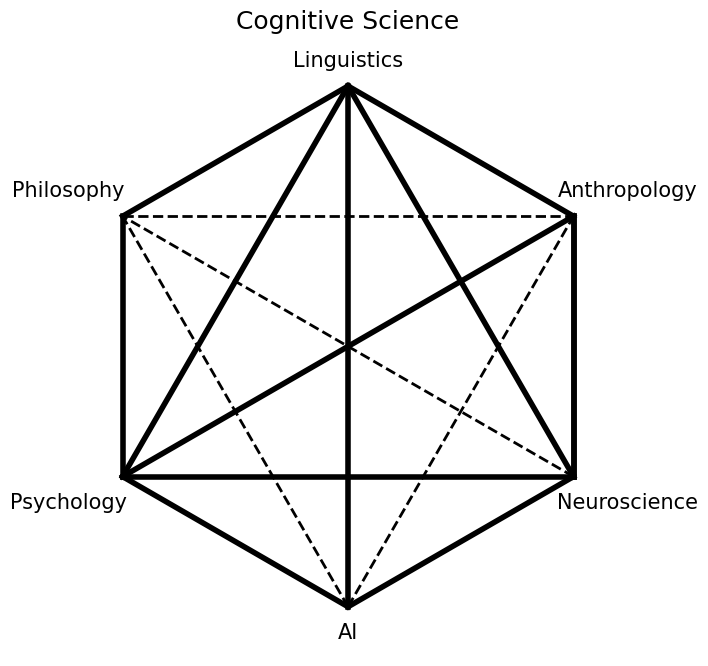

In [2]:
### Cognitive Science Plot
import matplotlib.pyplot as plt
import math


def plot_cogsci():
    fields = {
        "Linguistics": (0, 1),
        "Anthropology": (math.sqrt(3)/2, 0.5),
        "Neuroscience": (math.sqrt(3)/2, -0.5),
        "AI": (0, -1),
        "Psychology": (-math.sqrt(3)/2, -0.5),
        "Philosophy": (-math.sqrt(3)/2, 0.5)
    }
    solid_edges = [
        ("Psychology", "Linguistics"),
        ("Linguistics", "AI"),
        ("AI", "Neuroscience"),
        # ("Anthropology", "Psychology"),
        ("Psychology", "AI"),
        ("Linguistics", "Anthropology"),
        ("Anthropology", "Neuroscience"),
        ("Psychology", "Neuroscience"),
        ("Psychology", "Philosophy"),
        ("Psychology", "Anthropology"), 
        ("Linguistics", "Philosophy"),
        ("Neuroscience", "Anthropology"),
        ("Linguistics", "Neuroscience")
    ]
    dashed_edges = [
        ("Neuroscience", "Philosophy"),
        ("AI", "Philosophy"),
        ("Philosophy", "Anthropology"),
        ("AI", "Anthropology"),   
    ]
    def draw_edge(f1, f2, style='solid'):
        x1, y1 = fields[f1]
        x2, y2 = fields[f2]
        plt.plot([x1, x2], [y1, y2],
                linestyle='-' if style=='solid' else '--',
                color='black', linewidth=4 if style=='solid' else 2)
        
    label_offset = 0.20
    for f, (x, y) in fields.items():
        angle = math.atan2(y, x)
        if f == "Neuroscience" or f == "Anthropology" or f == "Philosophy" or f == "Psychology":
            x_text = x + label_offset * 1.2 * math.cos(angle)
            y_text = y + label_offset * math.sin(angle)
            plt.text(x_text, y_text, f, fontsize=15, ha='center', va='center')
        else:
            x_text = x + (label_offset/2) * math.cos(angle)
            y_text = y + (label_offset/2) * math.sin(angle)
            plt.text(x_text, y_text, f, fontsize=15, ha='center', va='center')
    
    for f1, f2 in solid_edges:
        draw_edge(f1, f2, style='solid')

    for f1, f2 in dashed_edges:
        draw_edge(f1, f2, style='dashed')

    plt.axis('equal')      
    plt.axis('off')      
    plt.title("Cognitive Science", fontsize=18)
    plt.subplots_adjust(top=1.4)
    # plt.show()
    # plt.savefig("cogsci_plot.png", transparent=True, bbox_inches='tight')
plot_cogsci()

# Night Science

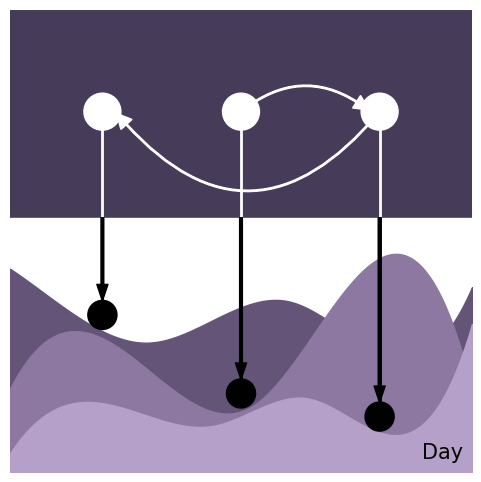

In [1]:
### Night science plot

from matplotlib.patches import FancyArrowPatch
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.patches as patches

# Updated function to include arrowheads on Bezier curves
def generate_diagram_with_arrowheads(ax=None,
                                     aligned_x_positions=None, 
                                     terrain_control_points=None, 
                                     terrain_colors=None,
                                     night_circle_height=390, 
                                     night_section_height=225):
    """
    Generate a custom Night and Day diagram with cubic Bezier curved arrows, arrowheads, and an adjusted Night section.

    Parameters:
    - aligned_x_positions: List of x-coordinates for the aligned circles.
    - terrain_control_points: List of control points for each terrain layer.
    - terrain_colors: List of RGB tuples for the terrain layers.
    - night_circle_height: Vertical height of the circles in the Night section.
    - night_section_height: Height of the Night section.
    """
    # Default parameters if not provided
    if aligned_x_positions is None:
        aligned_x_positions = [100, 250, 400]
    if terrain_control_points is None:
        terrain_control_points = [
            [(0, 220), (95, 155), (150, 140), (300, 185), (400, 130), (500, 200)],  # Top terrain
            [(0, 90), (150, 110), (260, 70), (350, 180), (500, 90)],               # Middle terrain
            [(0, 20), (120, 70), (220, 50), (320, 80), (420, 40), (500, 160)]       # Bottom terrain
        ]
    if terrain_colors is None:

        # PURPLE PALETTE
        terrain_colors = [
            # (70/255, 60/255, 90/255),     # Dusty Eggplant
            (100/255, 85/255, 120/255),   # Muted Mulberry
            (140/255, 120/255, 160/255),  # Soft Heather
            (180/255, 160/255, 200/255)   # Washed Lavender
        ]
        # RED PALETTE
        # [
        #     # (80/255, 20/255, 20/255),    # Deep Red
        #     (150/255, 50/255, 50/255),   # Warm Brick Red
        #     (220/255, 120/255, 120/255), # Soft Rose
        #     (250/255, 180/255, 180/255)  # Light Pink
        # ]
        
        # BLUE PALETTE
        # [
        #     # (20/255, 20/255, 80/255),    # Deep Navy Blue
        #     (50/255, 80/255, 150/255),   # Ocean Blue
        #     (120/255, 150/255, 220/255), # Soft Sky Blue
        #     (180/255, 210/255, 250/255)  # Pale Ice Blue
        # ]
        
        # GREEN PALETTE
        # [
        #     (20/255, 80/255, 20/255),    # Deep Forest Green
        #     (60/255, 150/255, 60/255),   # Mid Grass Green
        #     (120/255, 200/255, 120/255), # Light Pastel Green
        #     (180/255, 250/255, 180/255)  # Pale Mint
        # ]        


    # Calculate Night circle positions
    night_circles = [(x, night_circle_height) for x in aligned_x_positions]

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, 500)
    ax.set_ylim(0, 500)
    ax.axis('off')

    # Draw the top "Night" section
    ax.add_patch(patches.Rectangle((0, 500 - night_section_height), 500, night_section_height, 
                                   color=(70/255, 60/255, 90/255)))

    # Add the "Night" label
    # ax.text(10, 480, "Night", color="white", fontsize=15, verticalalignment='top')

    # Draw the white circles in the Night section
    for x_n, y_n in night_circles:
        circle = patches.Circle((x_n, y_n), radius=20, edgecolor='white', facecolor='white')
        ax.add_patch(circle)

    # Add cubic Bezier curved arrow (Second to Third - Over the Top)
    arrow_top = FancyArrowPatch(
        (aligned_x_positions[1], night_circle_height),  # Start point
        (aligned_x_positions[2]-10, night_circle_height),  # End point
        connectionstyle="arc3,rad=-0.4",  # Curvature
        arrowstyle="Simple,tail_width=0.5,head_width=10,head_length=10",
        color="white",
        linewidth=1.5
    )
    ax.add_patch(arrow_top)

    # Add cubic Bezier curved arrow (Third to First - Under the Bottom)
    arrow_bottom = FancyArrowPatch(
        (aligned_x_positions[2], night_circle_height),  # Start point
        (aligned_x_positions[0]+14, night_circle_height),  # End point
        connectionstyle="arc3,rad=-0.6",  # Curvature
        arrowstyle="Simple,tail_width=0.5,head_width=10,head_length=10",
        color="white",
        linewidth=1.5
    )
    ax.add_patch(arrow_bottom)

    # Draw the bottom "Day" section
    ax.add_patch(patches.Rectangle((0, 0), 500, 500 - night_section_height, color='white'))

    # Add the "Day" label
    ax.text(490, 10, "Day", color="black", fontsize=15, verticalalignment='bottom', horizontalalignment='right')

    # Draw the terrains
    terrain_y = []
    for control_points, color in zip(terrain_control_points, terrain_colors):
        # Draw the terrain using interpolation
        x, y = zip(*control_points)
        spline = make_interp_spline(x, y, k=3)  # Cubic spline for smoothness
        x_smooth = np.linspace(min(x), max(x), 500)
        y_smooth = spline(x_smooth)
        ax.fill_between(x_smooth, y_smooth, y2=0, color=color)
        terrain_y.append(y_smooth)

    # Place black circles on terrain (aligned with white circles)
    day_circles = [(x, terrain_y[i][x]) for i, x in enumerate(aligned_x_positions)]
    day_circles = [(100, 170), (250, 85), (400, 60)]

    for x_d, y_d in day_circles:
        circle = patches.Circle((x_d, y_d), radius=15, edgecolor='black', facecolor='black', linewidth=2)
        ax.add_patch(circle)

    # Draw vertical arrows with perfect alignment
    for (nx, ny), (dx, dy) in zip(night_circles, day_circles):
        # White line in Night section
        ax.plot([nx, dx], [ny, 500 - night_section_height], color="white", linewidth=2)
        # Black line in Day section
        ax.plot([dx, dx], [500 - night_section_height, dy], color="black", linewidth=2)
        # Add arrowheads for visibility
        ax.annotate("", xy=(dx, dy + 15), xytext=(dx, 500 - night_section_height),
                    arrowprops=dict(facecolor='black', edgecolor='black', width=2, headwidth=8))
        

    # Show the plot
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


# Re-run the function with arrowheads on Bezier curves
generate_diagram_with_arrowheads()


# Timeline

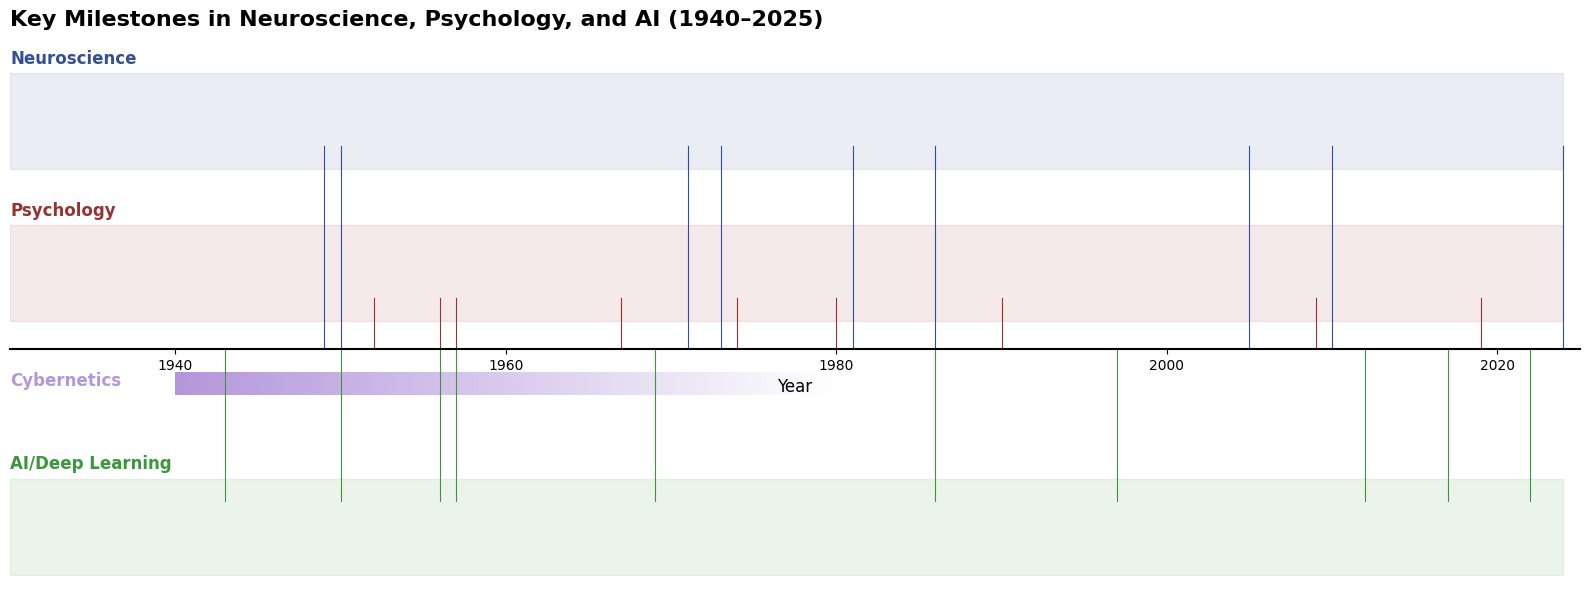

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
import numpy as np
from matplotlib.colors import to_rgba
from datetime import timedelta

# Timeline event data
neuro_events = [
    (1949, "Hebbian learning (Hebb)"),
    (1950, "Homunculus (Penfield)"),
    (1971, "Place cells"),
    (1973, "LTP"),
    (1981, "Sperry, Hubel & Wiesel win Nobel Prize"),
    (1986, "Population coding"),
    (2005, "Grid cells"),
    (2010, "Optogenetics"),
    (2024, "Brain foundation models")
]
psych_events = [
    (1952, "DSM published"),
    (1956, "'Magic Number Seven' (Miller)"),
    (1957, "Patient H.M. (Scoville & Milner)"),
    (1967, "CBT (Beck, Ellis)"),
    (1974, "Baddeley & Hitch model of working memory"),
    (1980, "DSM III published"),
    (1990, "Schema therapy (Young)"),
    (2009, "RDoC framework introduced"),
    (2019, "Hitop, ICD 11 and DSM 5tr")
]
ai_events = [
    (1943, "McCulloch & Pitts model"),
    (1950, "Turing's Imitation Game"),
    (1956, "Dartmouth Conference"),
    (1957, "Perceptron (Rosenblatt)"),
    (1969, "Minsky and Papert's Perceptrons"),
    (1986, "PDP"),
    (1997, "Deep Blue defeats Kasparov"),
    (2012, "AlexNet"),
    # (2016, "AlphaGo beats Lee Sedol"),
    (2017, "Transformer"),
    (2022, "ChatGPT release")
]

# Assemble timeline dataframe
ai_df = pd.DataFrame(ai_events, columns=["Date", "Event"])
ai_df["Category"] = "AI/Deep Learning"
neuro_df = pd.DataFrame(neuro_events, columns=["Date", "Event"])
neuro_df["Category"] = "Neuroscience"
psych_df = pd.DataFrame(psych_events, columns=["Date", "Event"])
psych_df["Category"] = "Psychology"
timeline_df = pd.concat([ai_df, neuro_df, psych_df], ignore_index=True)
timeline_df["Date"] = pd.to_datetime(timeline_df["Date"], format="%Y")

# Plot and layout settings
category_y = {
    "Neuroscience": 4.5,
    "Psychology": 1.5,
    "AI/Deep Learning": -3.5
}
category_colors = {
    "Neuroscience": (50/255, 80/255, 150/255),
    "Psychology": (150/255, 50/255, 50/255),
    "AI/Deep Learning": (60/255, 150/255, 60/255)
}
extended_left_date = pd.to_datetime("1930-01-01")
vertical_band_half_height = 0.95
label_offset = vertical_band_half_height + 0.1
patch_width = timedelta(days=(timeline_df["Date"].max() - extended_left_date).days)

# Cybernetics influence band
cyber_y_min = -0.9
cyber_y_max = -0.45
cyber_start = pd.to_datetime("1940-01-01")
cyber_end = pd.to_datetime("1980-01-01")
cyber_color = (180/255, 150/255, 220/255)

# Create smooth gradient overlay image
fade_width = (cyber_end - cyber_start).days
gradient = np.linspace(1.0, 0.0, fade_width).reshape(1, -1)
base_rgb = to_rgba(cyber_color, alpha=1.0)
rgba_image = np.ones((1, fade_width, 4))
rgba_image[..., 0] = base_rgb[0]
rgba_image[..., 1] = base_rgb[1]
rgba_image[..., 2] = base_rgb[2]
rgba_image[..., 3] = gradient

# Convert date extent to float format for imshow
cyber_start_num = mdates.date2num(cyber_start)
cyber_end_num = mdates.date2num(cyber_end)

# Plot
fig, ax = plt.subplots(figsize=(16, 6))
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_position(("data", 0))
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines[["top", "right", "left"]].set_visible(False)

# Background bands
for category, y_val in category_y.items():
    ax.add_patch(patches.Rectangle(
        (extended_left_date, y_val - vertical_band_half_height),
        patch_width,
        2 * vertical_band_half_height,
        color=category_colors[category], alpha=0.1, zorder=0
    ))
    # Band titles
    ax.text(extended_left_date, y_val + label_offset, category,
            fontsize=12, verticalalignment='bottom', horizontalalignment='left',
            color=category_colors[category], weight='bold')

# Smooth fade overlay for Cybernetics
ax.imshow(
    rgba_image,
    extent=[cyber_start_num, cyber_end_num, cyber_y_min, cyber_y_max],
    aspect='auto',
    origin='lower',
    zorder=1
)
ax.text(extended_left_date, cyber_y_max, "Cybernetics", fontsize=12,
        verticalalignment='top', horizontalalignment='left',
        color=cyber_color, weight='bold')

# Connector lines
for _, row in timeline_df.iterrows():
    field_y = category_y[row["Category"]] - 0.5 if category_y[row["Category"]] > 0 else category_y[row["Category"]] + 0.5
    ax.plot([row["Date"], row["Date"]], [field_y, 0],
            color=category_colors[row["Category"]], linewidth=0.8)

# Axes and title
ticks = pd.date_range("1940-01-01", "2025-01-01", freq="20YS")
ax.set_xticks(ticks)
ax.set_xticklabels([str(t.year) for t in ticks], rotation=0, fontsize=10)
ax.set_xlabel("Year", fontsize=12)
ax.set_xlim(extended_left_date, timeline_df["Date"].max() + pd.DateOffset(years=1))
ax.set_yticks([])

# Compute y limits so nothing is clipped
ymin = min(category_y.values()) - vertical_band_half_height - 0.1
ymax = max(category_y.values()) + vertical_band_half_height + 0.1
ax.set_ylim(ymin, ymax)

ax.set_title("Key Milestones in Neuroscience, Psychology, and AI (1940–2025)",
             fontsize=16, loc="left", pad=30, weight='bold')
ax.grid(False)
plt.tight_layout()

# plt.savefig("timeline_skeleton.svg", transparent=True, format="svg")
plt.show()


# Hype

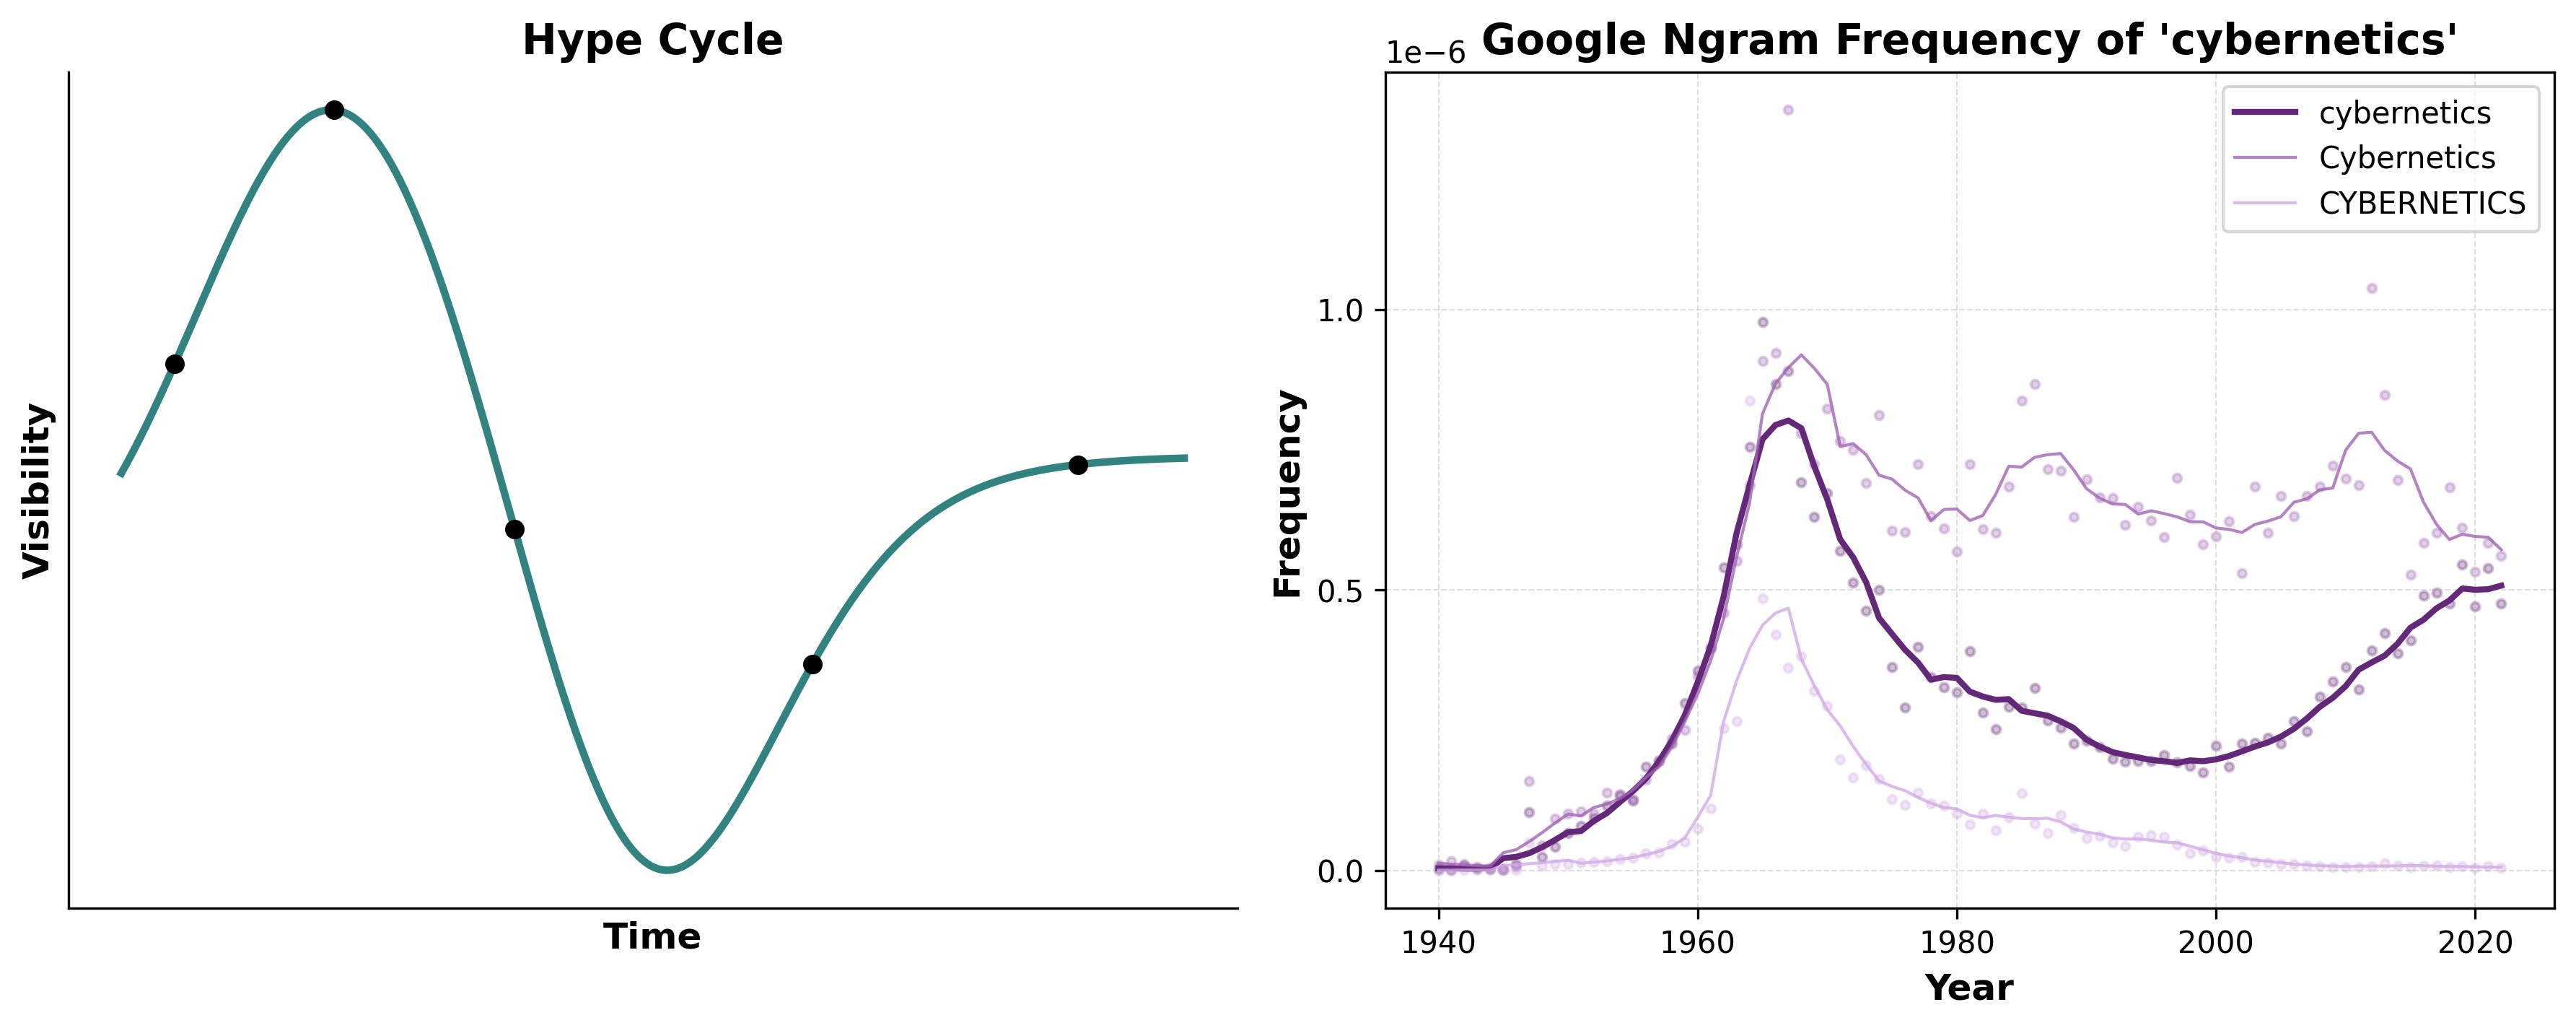

In [4]:
### Hype & Cybernetics Together
import numpy as np
import matplotlib.pyplot as plt
import requests
import pandas as pd

### Hype Cycle Plot ###
# Define the x-axis (time progression)
x = np.linspace(0, 10, 500)

# Define a smooth function that resembles the "hype cycle"
def hype_cycle_smooth(x):
    return (
        1.5 * np.exp(-0.3 * (x - 2)**2) +  # Rapid rise and peak
        -0.8 * np.exp(-0.5 * (x - 5)**2) +  # Sharp trough
        0.5 / (1 + np.exp(-1.5 * (x - 7)))  # Gradual stabilization
    )
y = hype_cycle_smooth(x)

### Google Ngram Data Retrieval ###
url = "https://books.google.com/ngrams/json"

query_params = {
    "content": "cybernetics,Cybernetics,CYBERNETICS",
    "year_start": 1940,
    "year_end": 2022,
    "corpus": "en",
    "smoothing": 0,
    "case_insensitive": False
}

response = requests.get(url, params=query_params)
data = response.json()

# Set the smoothing window size (higher = more smoothing)
smoothing_window = 6  

### Create a figure with two subplots ###
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)  # Side-by-side

# ==== Plot 1: Hype Cycle ====
ax = axes[0]  # First subplot
ax.plot(x, y, color=(50/255, 130/255, 130/255), linewidth=2.5, label="Technology Hype Cycle")

# Add labeled points for different phases
phases = {
    "Technology Trigger": (0.5, hype_cycle_smooth(0.5)),
    "Peak of Inflated Expectations": (2, hype_cycle_smooth(2)),
    "Trough of Disillusionment": (3.7, hype_cycle_smooth(3.7)),
    "Slope of Enlightenment": (6.5, hype_cycle_smooth(6.5)),
    "Plateau of Productivity": (9, hype_cycle_smooth(9)),
}

for label, (x_point, y_point) in phases.items():
    ax.scatter(x_point, y_point, color='black', s=30, zorder=3)
    # ax.text(x_point, y_point - 0.2, label, fontsize=9, ha='center', va='top', bbox=dict(facecolor='white', alpha=0.9, edgecolor='none', pad=1))


# Labels and Styling
ax.set_xlabel("Time", fontsize=12, fontweight='bold')
ax.set_ylabel("Visibility", fontsize=12, fontweight='bold')
ax.set_title("Hype Cycle", fontsize=14, fontweight='bold')
# ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.6)

# ==== Plot 2: Google Ngram Data ====
ax2 = axes[1]  # Second subplot

# Color scheme
colors = {
    "cybernetics": (100/255, 40/255, 120/255),    # Deep purple
    "Cybernetics": (160/255, 100/255, 180/255),   # Medium lavender
    "CYBERNETICS": (210/255, 170/255, 230/255)    # Soft lilac
}
if data:
    for entry in data:
        term = entry["ngram"]
        ngram_data = entry["timeseries"]
        years = list(range(query_params["year_start"], query_params["year_end"] + 1))
        
        df = pd.DataFrame({'Year': years, 'Frequency': ngram_data})
        df["Smoothed_Frequency"] = df["Frequency"].rolling(
            window=smoothing_window, center=True, min_periods=1).mean()

        # Plot smoothed data
        ax2.plot(df["Year"], df["Smoothed_Frequency"], linestyle="-",
                 label=f"{term}", color=colors.get(term, "gray"),
                 alpha=0.8 if term != "cybernetics" else 1.0,
                 linewidth=2 if term == "cybernetics" else 1)

        # Scatter raw data (optional)
        ax2.scatter(df["Year"], df["Frequency"], s=8, color=colors.get(term, "gray"), alpha=0.3)

    # Labels and Styling
    ax2.set_xlabel("Year", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Frequency", fontsize=12, fontweight='bold')
    ax2.set_title("Google Ngram Frequency of 'cybernetics'", fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, linestyle="--", linewidth=0.5, alpha=0.4)
    ax2.locator_params(axis='y', nbins=4)

ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  # Remove checkered grid

# Adjust spacing between plots
plt.tight_layout()
# plt.savefig('hype_cybernetics_combined.svg', format='svg', bbox_inches='tight', transparent=True)
plt.show()


# Cognitive Maps, Schemas, and Object Relations

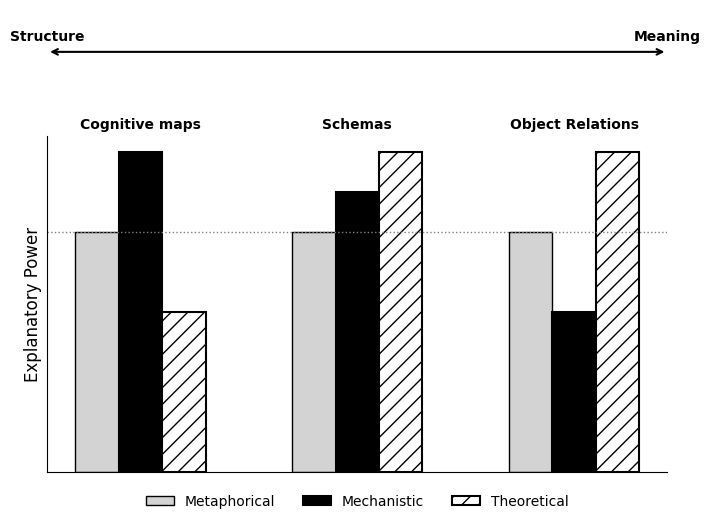

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Data
representations = ['Cognitive maps', 'Schemas', 'Object Relations']
levels = ['Metaphorical', 'Theoretical', 'Mechanistic']
values = np.array([
    [3, 4, 2],  
    [3, 3.5, 4],  
    [3, 2, 4]   
])
locked_value = 3 
bar_width = 0.2
x = np.arange(len(representations))

# Create figure and gridspec
fig = plt.figure(figsize=(8, 6))
gs = GridSpec(2, 1, height_ratios=[1,4], hspace=0.2)

### Axis plot here
ax1 = fig.add_subplot(gs[0])
ax1.axis('off')
ax1.annotate('', xy =(1, 0.5), xytext =(0, 0.5),
            arrowprops=dict(arrowstyle='<->', lw=1.5, color='black'))
ax1.text(0, 0.6, 'Structure', ha='center', va='bottom', fontsize=10, fontweight='bold')
ax1.text(1, 0.6, 'Meaning', ha='center', va='bottom', fontsize=10, fontweight='bold')


### Barchart here
ax2 = fig.add_subplot(gs[1])
ax2.bar(x + 0 * bar_width, values[:, 0], width=bar_width,
    color='lightgrey', edgecolor='black', label='Metaphorical')
ax2.bar(x + 1 * bar_width, values[:, 1], width=bar_width,
    color='black', edgecolor='black', label='Mechanistic', linewidth=1.5)
ax2.bar(x + 2 * bar_width, values[:, 2], width=bar_width,
    color='white', edgecolor='black', linewidth=1.5, label='Theoretical', hatch='//')

# Add rep labels above the groups
for i, representation in enumerate(representations):
    center = x[i] + bar_width
    ax2.text(center, max(values[i]) + 0.25, representation, ha='center', va='bottom', fontsize=10, fontweight='bold')

ax2.set_xticks([])
ax2.axhline(locked_value, color='gray', linestyle=':', linewidth=1)
ax2.set_ylabel('Explanatory Power', fontsize=12)
ax2.set_yticks([])
ax2.tick_params(axis='y', labelsize=10)
ax2.grid(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.03), ncol=len(levels), frameon=False)


# transparent background
# plt.savefig('representations_barchart.svg', format='svg', transparent=True)
plt.show()
